# Incidence Rate

The incidence rate is a measure of how fast new cases of a disease occur in a population over time. 
It is often expressed per unit of population and per unit of time.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

# Define the path to your text file
file_path = './Data/twitter16/label.txt'

# Initialize empty lists to store the data
labels = []
values = []

# Read the file line by line and extract the data
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        label, value = line.split(':')  # Split the line into label and value
        labels.append(label)
        values.append(int(value))  # Convert the value to an integer

# Create a DataFrame from the lists
df = pd.DataFrame({'Label': labels, 'SourceTweetID': values})

# Optionally, you can filter the DataFrame based on specific labels:
#df_filtered = df[df['Label'].isin(['true', 'false'])]
df = df[df['Label'].isin(['true', 'false'])]
df_filtered =df.copy()

df_filtered['Label'] = df['Label'].str.lower().replace({'true': True, 'false': False})

distinct_labels = df['Label'].unique()
print(distinct_labels)

# Display the DataFrame
df_filtered


['false' 'true']


,Label,SourceTweetID
0,False,656955120626880512
1,True,615689290706595840
2,False,613404935003217920
5,True,614467824313106432
9,False,622891631293935616
...,...,...
799,True,552806757672964097
801,True,544350567183556608
805,True,614593386188828672
811,True,650046859537448960


In [2]:


#df_filtered['Label']=df_filtered['Label'].astype(bool)
df_filtered_dict = df_filtered.set_index('SourceTweetID')['Label'].to_dict()
df_filtered_dict[656955120626880512]
# bool(dict_of_lists[656955120626880512])

False

## Getting Maximum Length Of Rumors That Is True For Twitter 16

In [3]:
rumor_tweet_id= df_filtered['SourceTweetID'].unique()

In [4]:
import os
import pandas as pd

# Define the path to your folder containing files
folder_path ='./Data/twitter16/tree' #'./Data/testtree'


# Initialize empty lists to store the extracted data
sender_uid = []
sender_tweet_id = []
sender_post_time_delay = []
receiver_uid = []
receiver_tweet_id = []
receiver_post_time_delay = []
tweet_label=[]
counter=0
# Iterate through the files in the folder
for filename in os.listdir(folder_path):
#     counter=counter+1
#     if counter>10000:
#         break
    file_path = os.path.join(folder_path, filename)
    if int(filename.replace(".txt","")) in rumor_tweet_id: 
        #print(filename.replace(".txt","") ,' is present')
            # Open and read each file
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line to extract the sender and receiver data
                sender_data, receiver_data = line.strip().split('->')

                sender_values = sender_data.strip('[]').replace("'", "").split(', ')
                receiver_values = receiver_data.strip('[]').replace("'", "").split(', ')

                sender_uid.append(sender_values[0])
                sender_tweet_id.append(sender_values[1])
                sender_post_time_delay.append(float(sender_values[2]))

                receiver_uid.append(receiver_values[0])
                receiver_tweet_id.append(receiver_values[1])
                receiver_post_time_delay.append(float(receiver_values[2]))
                
                #print(int(filename.replace(".txt","")))
                tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
    #else: 
        #print(filename.replace(".txt","") ,' is NOT present')
    
    


# Create a DataFrame from the extracted data
df_Joined = pd.DataFrame({
    'sender_uid': sender_uid,
    'sender_tweet_id': sender_tweet_id,
    'sender_post_time_delay': sender_post_time_delay,
    'receiver_uid': receiver_uid,
    'receiver_tweet_id': receiver_tweet_id,
    'receiver_post_time_delay': receiver_post_time_delay,
    'tweet_label':tweet_label
})
df_Joined = df_Joined[df_Joined['sender_uid'] != 'ROOT']
# Print the DataFrame
df_Joined

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay,tweet_label
1,24165761,498430783699554305,0.0,33164207,498430783699554305,0.30,True
2,24165761,498430783699554305,0.0,203957378,498430783699554305,1.00,True
3,24165761,498430783699554305,0.0,475947737,498430783699554305,1.00,True
4,24165761,498430783699554305,0.0,367810627,498430783699554305,2.70,True
5,24165761,498430783699554305,0.0,144351126,498430783699554305,2.85,True
...,...,...,...,...,...,...,...
161999,972651,681767380305985536,0.0,34294546,681767380305985536,626.48,False
162000,972651,681767380305985536,0.0,19058535,681767380305985536,1644.97,False
162001,972651,681767380305985536,0.0,20732140,681767380305985536,2088.33,False
162002,972651,681767380305985536,0.0,2185248516,681767380305985536,2121.45,False


In [5]:
true_data = df_Joined[(df_Joined['tweet_label'] == True ) & (df_Joined['receiver_post_time_delay']<1440)]
false_data = df_Joined[(df_Joined['tweet_label'] == False) & (df_Joined['receiver_post_time_delay']<1440)]
true_data.sort_values(by='receiver_post_time_delay')
true_data = true_data.reset_index(drop=True)
true_data

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay,tweet_label
0,24165761,498430783699554305,0.00,33164207,498430783699554305,0.30,True
1,24165761,498430783699554305,0.00,203957378,498430783699554305,1.00,True
2,24165761,498430783699554305,0.00,475947737,498430783699554305,1.00,True
3,24165761,498430783699554305,0.00,367810627,498430783699554305,2.70,True
4,24165761,498430783699554305,0.00,144351126,498430783699554305,2.85,True
...,...,...,...,...,...,...,...
81184,16331010,681147789653356544,0.00,1367758014,681147789653356544,1235.75,True
81185,233811896,681147789653356544,8.58,2569777669,681147789653356544,1288.12,True
81186,633364819,681147789653356544,18.23,1557351980,681147789653356544,1390.05,True
81187,16331010,681147789653356544,0.00,972350635,681498100926672896,1392.02,True


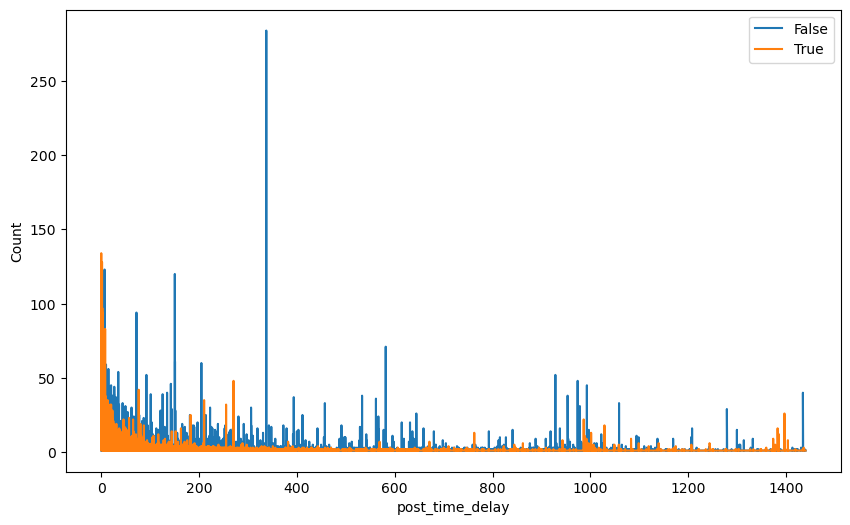

In [6]:
# Group the data by 'post_time_delay' and count the occurrences
grouped_data_true = true_data.groupby('receiver_post_time_delay')['tweet_label'].count().reset_index()
grouped_data_false = false_data.groupby('receiver_post_time_delay')['tweet_label'].count().reset_index()

plt.figure(figsize=(10, 6))  # Adjust the values as needed


plt.plot(grouped_data_false['receiver_post_time_delay'], grouped_data_false['tweet_label'], label='False')
plt.plot(grouped_data_true['receiver_post_time_delay'], grouped_data_true['tweet_label'], label='True')

plt.xlabel('post_time_delay')
plt.ylabel('Count')
plt.legend()  # Add a legend to differentiate between 'True' and 'False' lines

# Show the line chart
plt.show()

# Twitter 15

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

# Define the path to your text file
file_path = './Data/twitter15/label.txt'

# Initialize empty lists to store the data
labels = []
values = []

# Read the file line by line and extract the data
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        label, value = line.split(':')  # Split the line into label and value
        labels.append(label)
        values.append(int(value))  # Convert the value to an integer

# Create a DataFrame from the lists
df = pd.DataFrame({'Label': labels, 'SourceTweetID': values})

# Optionally, you can filter the DataFrame based on specific labels:
#df_filtered = df[df['Label'].isin(['true', 'false'])]
df = df[df['Label'].isin(['true', 'false'])]
df_filtered =df.copy()

df_filtered['Label'] = df['Label'].str.lower().replace({'true': True, 'false': False})

distinct_labels = df['Label'].unique()
print(distinct_labels)

# Display the DataFrame
df_filtered


['true' 'false']


,Label,SourceTweetID
4,True,551099691702956032
7,True,514106273852174337
9,False,495366618818830336
10,False,532206910796468224
11,False,560187970389819392
...,...,...
1480,True,528242965915779072
1481,True,407205235682050048
1482,True,508002575858561024
1484,True,427780584979836929


In [8]:


#df_filtered['Label']=df_filtered['Label'].astype(bool)
df_filtered_dict = df_filtered.set_index('SourceTweetID')['Label'].to_dict()
# df_filtered_dict[656955120626880512]
# bool(dict_of_lists[656955120626880512])

## Getting Maximum Length Of Rumors That Is True For Twitter 15

In [9]:
rumor_tweet_id= df_filtered['SourceTweetID'].unique()

In [10]:
import os
import pandas as pd

# Define the path to your folder containing files
folder_path ='./Data/twitter15/tree' #'./Data/testtree'


# Initialize empty lists to store the extracted data
sender_uid = []
sender_tweet_id = []
sender_post_time_delay = []
receiver_uid = []
receiver_tweet_id = []
receiver_post_time_delay = []
tweet_label=[]
counter=0
# Iterate through the files in the folder
for filename in os.listdir(folder_path):
#     counter=counter+1
#     if counter>10000:
#         break
    file_path = os.path.join(folder_path, filename)
    if int(filename.replace(".txt","")) in rumor_tweet_id: 
        #print(filename.replace(".txt","") ,' is present')
            # Open and read each file
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line to extract the sender and receiver data
                sender_data, receiver_data = line.strip().split('->')

                sender_values = sender_data.strip('[]').replace("'", "").split(', ')
                receiver_values = receiver_data.strip('[]').replace("'", "").split(', ')

                sender_uid.append(sender_values[0])
                sender_tweet_id.append(sender_values[1])
                sender_post_time_delay.append(float(sender_values[2]))

                receiver_uid.append(receiver_values[0])
                receiver_tweet_id.append(receiver_values[1])
                receiver_post_time_delay.append(float(receiver_values[2]))
                
                #print(int(filename.replace(".txt","")))
                tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
    #else: 
        #print(filename.replace(".txt","") ,' is NOT present')
    
    


# Create a DataFrame from the extracted data
df_Joined = pd.DataFrame({
    'sender_uid': sender_uid,
    'sender_tweet_id': sender_tweet_id,
    'sender_post_time_delay': sender_post_time_delay,
    'receiver_uid': receiver_uid,
    'receiver_tweet_id': receiver_tweet_id,
    'receiver_post_time_delay': receiver_post_time_delay,
    'tweet_label':tweet_label
})
df_Joined = df_Joined[df_Joined['sender_uid'] != 'ROOT']
# Print the DataFrame
df_Joined

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay,tweet_label
1,39364684,265953285247209472,0.00,21061006,265953402234748928,0.45,False
2,39364684,265953285247209472,0.00,18513522,265953502839308289,0.85,False
3,39364684,265953285247209472,0.00,38251731,265953577145614336,1.15,False
4,39364684,265953285247209472,0.00,22369434,265953587149021185,1.20,False
5,39364684,265953285247209472,0.00,98928660,265953639959506944,1.40,False
...,...,...,...,...,...,...,...
257421,24767833,91728807081426944,2372812.17,152746927,91728807081426944,2437586.77,False
257422,251183505,91728807081426944,2372738.45,114914347,91728807081426944,2437688.90,False
257423,170886667,91728807081426944,0.00,2875882289,91728807081426944,2437696.77,False
257424,3313577574,91728807081426944,2373153.65,502385408,91728807081426944,2453166.52,False


In [11]:
true_data = df_Joined[(df_Joined['tweet_label'] == True ) & (df_Joined['receiver_post_time_delay']<1440)  & (df_Joined['receiver_post_time_delay']>=0)]
false_data = df_Joined[(df_Joined['tweet_label'] == False) & (df_Joined['receiver_post_time_delay']<1440)  & (df_Joined['receiver_post_time_delay']>=0)]
true_data.sort_values(by='receiver_post_time_delay')
true_data = true_data.reset_index(drop=True)
true_data

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay,tweet_label
0,20003448,295152287901417472,0.0,598415412,295152495146184704,0.83,True
1,20003448,295152287901417472,0.0,438384029,295152287901417472,0.88,True
2,20003448,295152287901417472,0.0,237267675,295152287901417472,0.88,True
3,20003448,295152287901417472,0.0,508006338,295152287901417472,0.88,True
4,20003448,295152287901417472,0.0,493390865,295152287901417472,0.88,True
...,...,...,...,...,...,...,...
113532,28785486,574062768896212992,0.0,28240039,574062768896212992,667.45,True
113533,28785486,574062768896212992,0.0,428328096,574062768896212992,791.35,True
113534,28785486,574062768896212992,0.0,1334522816,574280909194674177,866.82,True
113535,28785486,574062768896212992,0.0,474927729,574062768896212992,1216.87,True


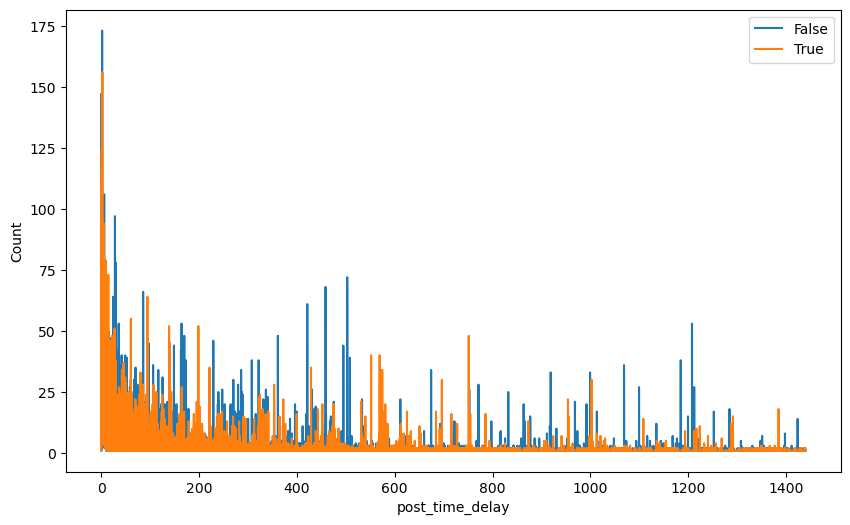

In [12]:
# Group the data by 'post_time_delay' and count the occurrences
grouped_data_true = true_data.groupby('receiver_post_time_delay')['tweet_label'].count().reset_index()
grouped_data_false = false_data.groupby('receiver_post_time_delay')['tweet_label'].count().reset_index()

plt.figure(figsize=(10, 6))  # Adjust the values as needed


plt.plot(grouped_data_false['receiver_post_time_delay'], grouped_data_false['tweet_label'], label='False')
plt.plot(grouped_data_true['receiver_post_time_delay'], grouped_data_true['tweet_label'], label='True')

plt.xlabel('post_time_delay')
plt.ylabel('Count')
plt.legend()  # Add a legend to differentiate between 'True' and 'False' lines

# Show the line chart
plt.show()